# Practice Session 05: Network models
<font size="+2" color="blue">Additional results: fitting of power-law</font>

Author: <font color="blue">Guillem Escriba Molto</font>

E-mail: <font color="blue">guillem.escriba01@estudiant.upf.edu</font>

Date: <font color="blue">04/11/2021</font>

# 1. Random (ER) graph generator

In [ ]:
pip install powerlaw

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
import powerlaw

In [ ]:
# Leave as-is

def flip_coin(p):
    if np.random.random() < p:
        return True
    else:
        return False

In [ ]:
def generate_random_graph(N,p):
    g = nx.Graph()  # Creamos el grafo
    for i in range(0,N): # Añadimos N nodos
        g.add_node(i)
        if i>0: # Si hay más de un nodo se crean enlaces
            for j in range(0,i-1): # Se prueba a crear enlaces desde el node 0 al i-1
                if flip_coin(p): # Se usa la probabilidad para decidir
                    g.add_edge(i,j)
    return g


In [ ]:
def my_is_connected(g):
  connected_status = True # Bandera que indica que está conectado
  for node1 in g.nodes(): # Por cada par node1, node2 en el grafo se busca un camino
    for node2 in g.nodes():
      if (node1 != node2): # Se evitan los el mismo nodo
        if nx.has_path(g,node1,node2): # Si hay un camino se mantiene el estado de conectado
          connected_status = True
        else:
          connected_status = False # Si no se cambia a False, y se finaliza
          return connected_status
  return connected_status


1.- Connected graph? True
2.- Connected graph? True
3.- Connected graph? True


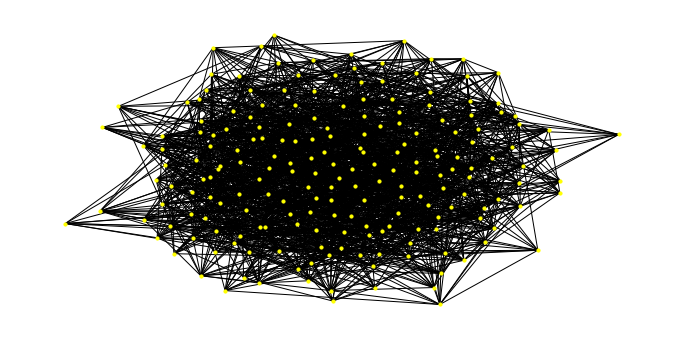

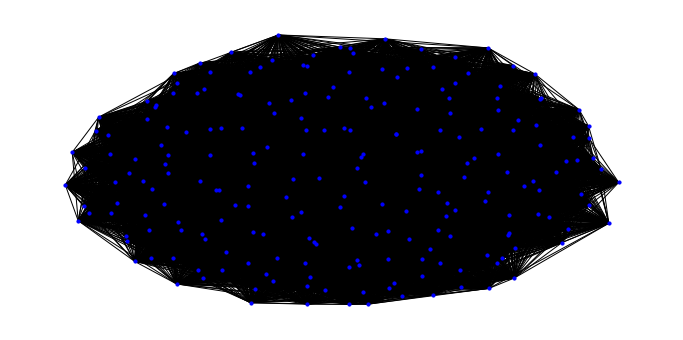

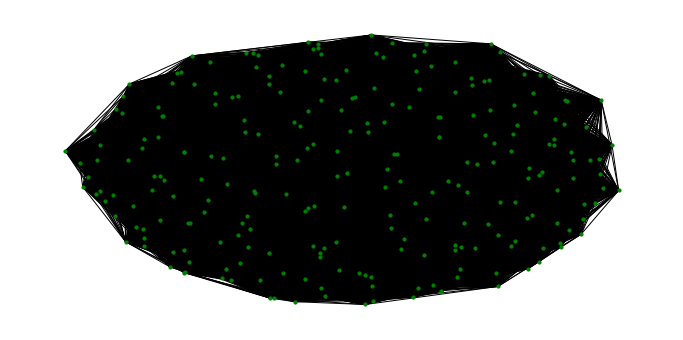

In [ ]:
# Graph 1

N = 200
p = 0.1
g = generate_random_graph(N,p)
print(("1.- Connected graph? %s")%(my_is_connected(g)))

plt.figure(figsize=(12,6))
plt.axis('off')
pos=nx.spring_layout(g)
nx.draw_networkx(g, pos, with_labels=False, node_size=10, node_color='yellow')

# Graph 2

N = 220
p = 0.5
g = generate_random_graph(N,p)
print(("2.- Connected graph? %s")%(my_is_connected(g)))

plt.figure(figsize=(12,6))
plt.axis('off')
pos=nx.spring_layout(g)
nx.draw_networkx(g, pos, with_labels=False, node_size=10, node_color='blue')

# Graph 3

N = 250
p = 0.8
g = generate_random_graph(N,p)
print(("3.- Connected graph? %s")%(my_is_connected(g)))

plt.figure(figsize=(12,6))
plt.axis('off')
pos=nx.spring_layout(g)
nx.draw_networkx(g, pos, with_labels=False, node_size=10, node_color='green')

In [ ]:
def print_er_statistics(g,p):
    k_sum = 0; # Inicializa la suma
    N = len(g.nodes()) # Número nodos
    E_k_avg = p*(N -1) # Grado medio esperado
    for i in range(0, N): # Suma todos los grados de los nodos
        k_sum += g.degree(i)
    k_avg = 0
    if N != 0: # Evita errores si N = 0
      k_avg = k_sum/N # Calcula la media de grados
    L = len(g.edges()) # Número de enlaces
    E_L = p * (N*(N-1))/2 # Calcula el número esperado de enlaces
    print(("The avg degree is: %d and the expected avg degree is: %d \nThe number of links is: %d and the expected nº of links is: %d")%(k_avg,E_k_avg,L,E_L))




In [ ]:
# Leave as-is or modify if you want

def plot_degree_distribution(g):
    degree_dict = dict(g.degree())
    degree_ordered = OrderedDict(sorted(degree_dict.items(), key=lambda x: x[1], reverse=True))
    degree_sequence = list(degree_ordered.values())
    prob, bin_edges = np.histogram(degree_sequence, bins=range(1,np.max(degree_sequence)+2), density=True)
    plt.figure(figsize=(8,4))
    plt.loglog(bin_edges[:-1], prob, 'x-')
    plt.title("Probability density function")
    plt.xlabel("degree")
    plt.ylabel("probability")
    plt.show()

1.- Connected graph? True
The avg degree is: 50 and the expected avg degree is: 49 
The number of links is: 12542 and the expected nº of links is: 12475


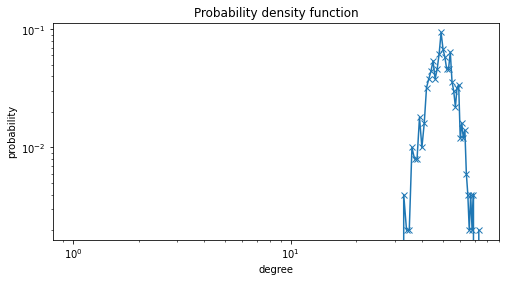

2.- Connected graph? True
The avg degree is: 187 and the expected avg degree is: 187 
The number of links is: 58507 and the expected nº of links is: 58500


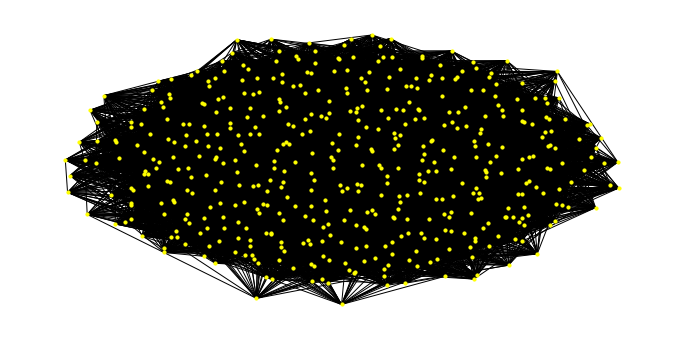

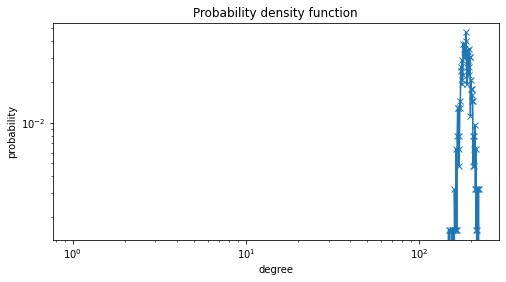

3.- Connected graph? True
The avg degree is: 372 and the expected avg degree is: 374 
The number of links is: 139590 and the expected nº of links is: 140437


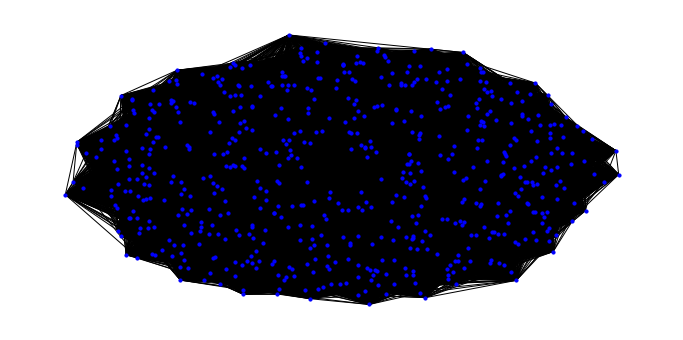

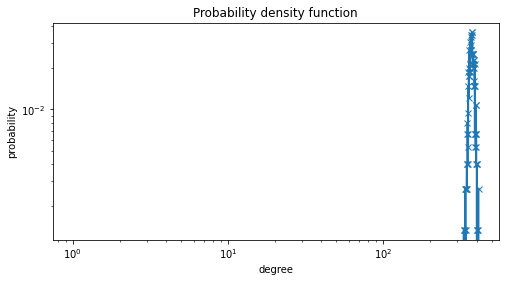

4.- Connected graph? True
The avg degree is: 610 and the expected avg degree is: 611 
The number of links is: 267285 and the expected nº of links is: 267662


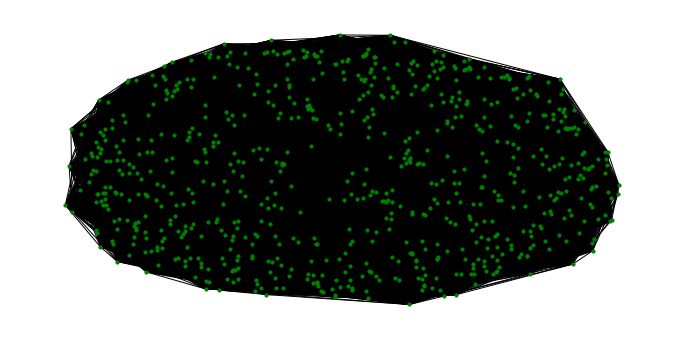

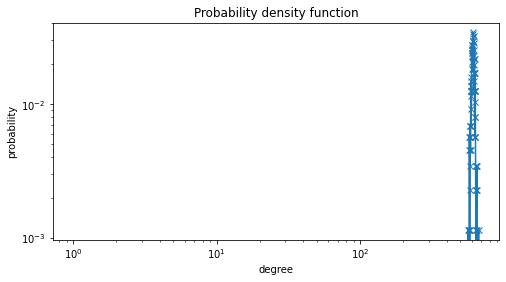

5.- Connected graph? True
The avg degree is: 897 and the expected avg degree is: 899 
The number of links is: 448800 and the expected nº of links is: 449550


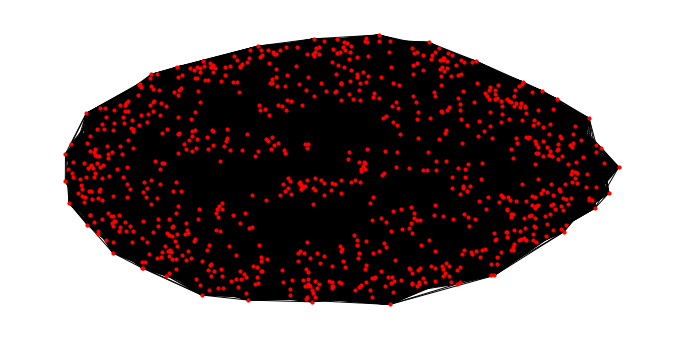

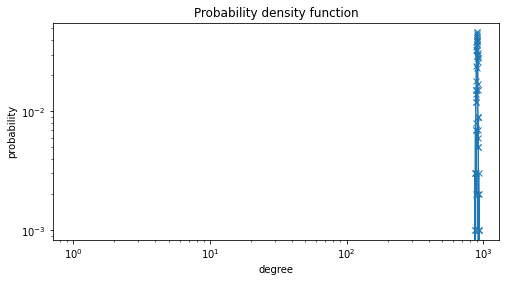

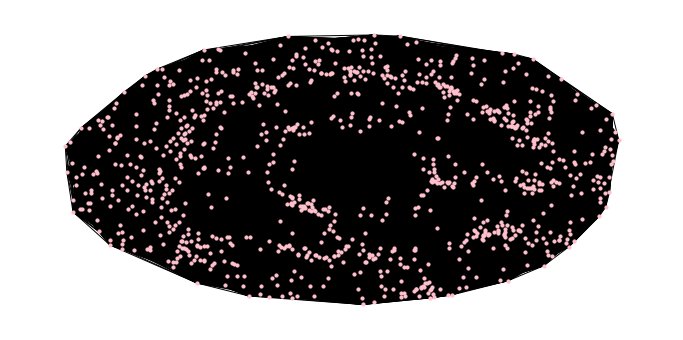

In [ ]:
# Graph 1

N = 500
p = 0.1
g = generate_random_graph(N,p)
print(("1.- Connected graph? %s")%(my_is_connected(g)))
print_er_statistics(g,p)
plot_degree_distribution(g)

plt.figure(figsize=(12,6))
plt.axis('off')
pos=nx.spring_layout(g)
nx.draw_networkx(g, pos, with_labels=False, node_size=10, node_color='yellow')

# Graph 2

N = 625
p = 0.3
g = generate_random_graph(N,p)
print(("2.- Connected graph? %s")%(my_is_connected(g)))
print_er_statistics(g,p)
plot_degree_distribution(g)

plt.figure(figsize=(12,6))
plt.axis('off')
pos=nx.spring_layout(g)
nx.draw_networkx(g, pos, with_labels=False, node_size=10, node_color='blue')

# Graph 3

N = 750
p = 0.5
g = generate_random_graph(N,p)
print(("3.- Connected graph? %s")%(my_is_connected(g)))
print_er_statistics(g,p)
plot_degree_distribution(g)

plt.figure(figsize=(12,6))
plt.axis('off')
pos=nx.spring_layout(g)
nx.draw_networkx(g, pos, with_labels=False, node_size=10, node_color='green')

# Graph 4

N = 875
p = 0.7
g = generate_random_graph(N,p)
print(("4.- Connected graph? %s")%(my_is_connected(g)))
print_er_statistics(g,p)
plot_degree_distribution(g)

plt.figure(figsize=(12,6))
plt.axis('off')
pos=nx.spring_layout(g)
nx.draw_networkx(g, pos, with_labels=False, node_size=10, node_color='red')


# Graph 5

N = 1000
p = 0.9
g = generate_random_graph(N,p)
print(("5.- Connected graph? %s")%(my_is_connected(g)))
print_er_statistics(g,p)
plot_degree_distribution(g)

plt.figure(figsize=(12,6))
plt.axis('off')
pos=nx.spring_layout(g)
nx.draw_networkx(g, pos, with_labels=False, node_size=10, node_color='pink')

<font size="+1" color="black">
Como podemos observar en el modelo ER, a mayor probabilidad, más enlaces se forman, cosa que se ve a simple vista con el primero y el último, mientras que en el primero se pueden apreciar ligeramente los enlaces el último es una amalgama negra con puntos rosas debido a la inmensa cantidad de enlaces que hay en uno respecto al otro, si bien es cierto que hay el doble de nodos, hay 10 veces más enlaces aproximadamente. Otra cosa a destacar es que la aproximación de grados y enlaces respecto a la realidad es sumamente precisa con variaciones entre sí entorno al 1% o incluso menores, esto se debe a que con grandes muestras los modelos basados en probabilidad tiene a converger hacia la misma.A su vez, conforme va aumentando la probabilidad, podemos observar en el pdf, que la distribución de grados está mucho más concentrada entorno a la media.</font>

# 2. Preferential attachment (BA) generator

In [ ]:

def select_targets(g, m):

    # Check if feasible
    N = g.number_of_nodes()
    if N < m:
        raise ValueError('Graph has less than m nodes')

    # Compute sum of degree
    sum_degree = 0

    # YOUR CODE HERE: COMPUTE SUM OF DEGREE OF NODES
    for (node, degree) in g.degree():
        sum_degree += degree

    if sum_degree == 0:
        raise ValueError('Graph as no edges')

    # Compute probabilities
    probabilities = []
    for (node, degree) in g.degree():
        # YOUR CODE HERE: COMPUTE PROBABILITY OF SELECTING NODE u
        # THEN APPEND IT TO probabilities USING probabilities.append(...)
        p = degree/sum_degree
        probabilities.append(p)

    # Sample without replacement
    selected = np.random.choice(g.nodes(), size=m, replace=False, p=probabilities)

    return selected

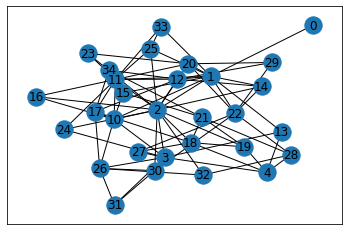

In [ ]:
def generate_preferential_attachment_graph(N, m0, m):

    if m0 < m: # Se comprueba que el m <= m0
        raise ValueError('Graph has less than m nodes')
    g = nx.Graph() # Se crea el grafo vacio
    for i in range(0,m0): # Se añaden nodos del 0 al m0-1
        g.add_node(i)
        if i!=0: # A partir de que haya más de un nodo, se enlaza cada uno con su anterior
            if i == m0: # Edge Nodo m0-1 con nodo 0
              g.add_edge(0,m0-1)
            else:
              g.add_edge(i,i-1)
    for i in range(m0,N): # Se añade N-m0 nodos más
        nodes = select_targets(g, m) # Se seleccionan m nodos para enlazar el siguiente nodo
        g.add_node(i+m0)
        for node in nodes:
            g.add_edge(i+m0,node)
    return g

g = generate_preferential_attachment_graph(30, 5, 3)
nx.draw_networkx(g)

In [ ]:
def my_powerlaw(g):

  degree_sequence = []
  for (node, degree) in g.degree(): #Extraen todos los degrees del grafo y los añaden a una lista
    degree_sequence.append(degree)

  results = powerlaw.Fit(degree_sequence) # Calcula la powerlaw
  print(results.power_law.alpha)
  powerlaw.plot_pdf(degree_sequence, color='b') #Dibuja la powerlaw

Graph 1: N = 1500,m0 = 3, m = 2


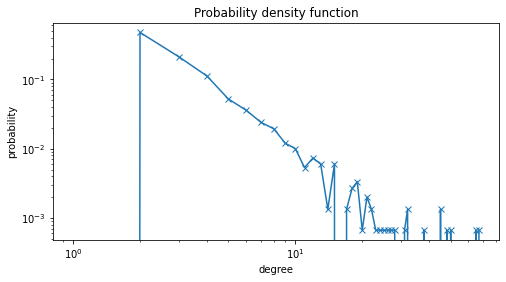

Calculating best minimal value for power law fit
3.1021562725041623
Graph 2: N = 2500,m0 = 9, m = 7


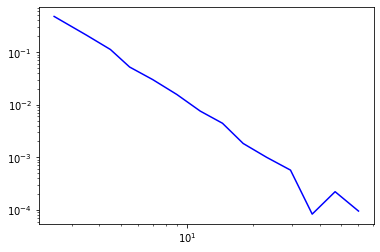

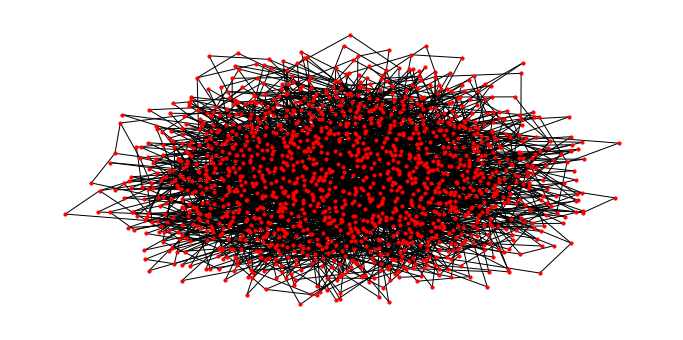

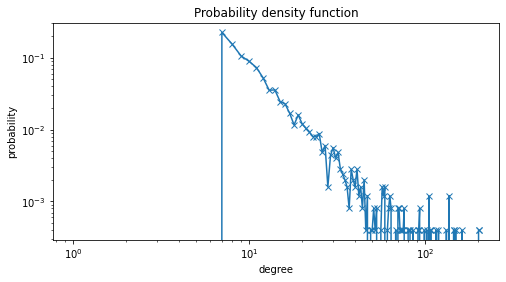

Calculating best minimal value for power law fit
2.9409190173314697


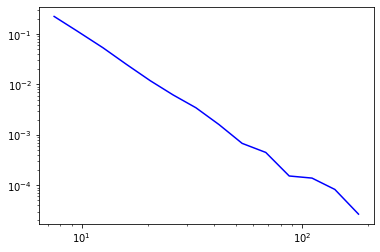

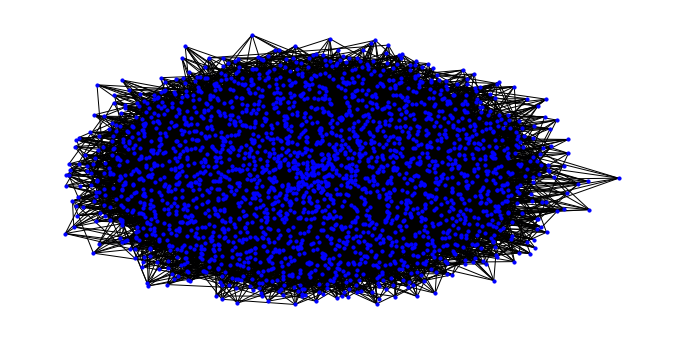

In [ ]:
# Graph 1

N = 1500
m0 = 3
m = 2
print( ( "Graph 1: N = %d,m0 = %d, m = %d" ) % ( N, m0, m) )
g = generate_preferential_attachment_graph(N, m0, m)

plot_degree_distribution(g)

my_powerlaw(g)

plt.figure(figsize=(12,6))
plt.axis('off')
pos=nx.spring_layout(g)
nx.draw_networkx(g, pos, with_labels=False, node_size=10, node_color='red')

# Graph 2
N = 2500
m0 = 9
m = 7
print( ( "Graph 2: N = %d,m0 = %d, m = %d" ) % ( N, m0, m) )
g = generate_preferential_attachment_graph(N, m0, m)

plot_degree_distribution(g)

my_powerlaw(g)

plt.figure(figsize=(12,6))
plt.axis('off')
pos=nx.spring_layout(g)
nx.draw_networkx(g, pos, with_labels=False, node_size=10, node_color='blue')

<font size="+1" color="black">
En el primer grafo podemos apreciar que la distribucion de grados está entre 2 y unos 30-40, esto se puede apreciar en la función de densidad de probabilidad. Esto se debe en gran medida a la m, ya que es el número de nuevos enlaces que genera cada nuevo nodo, a mayor m, mayor grado medio, esto se diferencia bastante del segundo grafo, cuya m es muy superior. En el segundo gráfico podemos ver la power law en escala logaritmica y como su distribución de grados es similar. El exponente que nos muestra ligeramente superior a 3 indica que decae de forma más rápida y por ende hay menos nodos de mayor grado. En el segundo grafo a diferencia del anterior su distribución de grados es considerablemente más grande yendo desde el 7 a más del 100 aproximadamente. Esto se deve a su m, que es más del triple de la anterior lo que favorece la aparición de nodos de alto grado. A su vez, esto se ve reflejado en la powerlaw, cuyo exponente es ligeramente menor a 3, a menor powerlaw, tarda más en decaer y por consiguiente aparecen más nodos de alto grado. Aún así, en ambos casos se puede ver que la power law está en torno al 3 correspondiente a Barabasi-Albert.

A diferencia de los grafos ER anteriores, aquí se puede apreciar como la distribución de grados es más dispersa, algo que se asemeja más a las redes conocidas donde hay nodos con pocas conexiones y otros con muchas de ellas, en cambio en las ER, todos los nodos suelen poseer un grado muy parecido. Otra diferencia respecto a las anteriores es que en BA, los nodos con mayor grado suelen ser aquellos que han aparecido antes, pues han tenido más posibilidades de ser escogido. </font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>